In [3]:
import numpy as np
import seaborn as sns   
import os
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
descs = [file for file in os.listdir('gitignored') if file.endswith('_desc.npy')]
ds_names = [file.split('_')[0] for file in descs]

metrics = [
    'n_classes',
    'n_instances_per_image',
    'n_images',
    'empty_masks_per',
    'image_size_mean',
    'canny_per_mean',
    'solidity_mean',
    'euler_number_mean',
    'area_perimeter_ratio_mean',
    'spatial_unpredictability',
]

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

def normalize_and_offset(value, min_val, max_val, offset=0.1):
    norm_value = (value - min_val) / (max_val - min_val)
    return norm_value * (1-offset) + offset  # Adding an offset to avoid starting from zero

datasets = (
    'CHASE DB1',
    'Carrot-Weed',
    'MangoNet',
    'Supervisely HRDA Plants Demo',
    "GlaS@MICCAI'2015: Gland Segmentation",
    'Panoramic Dental X-rays',
    'WGISD',
    'Concrete Crack Segmentation',
    'EMPS',
    'Coffee Leaf Biotic Stress',
    'Alfalfa Roots',
    'Supervisely Synthetic Crack Segmentation',
    'MSD',
    'Water Meters',
    'SUIM',
    'Full Body TikTok Dancing',
    'KolektorSDD2',
    'Accurate Nevus Shapes',
    'AeroScapes',
    'FPIC-Component',
    'PolypGen',
    'Accurate Drone Shapes',
    'Synthetic Plants',
    'Skin Cancer (HAM10000)',
    # 'CIHP',
    )
datasets = list(dsname.lower().replace(' ', '-') for dsname in datasets)

def print_desc(desc):
    strout = f"""
Single class: {desc['single_class']}
Many instances: {desc['many_instances']}
Big image: {desc['big_image']}
Many images: {desc['many_images']}
"""
    print(strout)


mins = {}
maxs = {}
df_data = []
data = []
sel_ds_names = []
for ind, descfile in enumerate(descs):
    if not ds_names[ind] in datasets:
        print(f'skipping {ds_names[ind]}...')
        continue
    values = []
    desc = np.load('gitignored/' + descfile, allow_pickle=True).item()
    df_data_line = {'dataset': ds_names[ind]} | {key: value if not isinstance(value, np.ndarray) else value[0] for key, value in desc.items()}
    df_data.append(df_data_line)

    for metric in metrics:
        value = desc[metric]
        if isinstance(value, np.ndarray):
            value = value[0]

        if not (metric in mins):
            mins[metric] = value
        elif value < mins[metric]:
            mins[metric] = value
        if not (metric in maxs):    
            maxs[metric] = value
        elif value > maxs[metric]:
            maxs[metric] = value
        values.append(value)
    data.append(values)
    sel_ds_names.append(ds_names[ind])
    print(f'loaded {ds_names[ind]} {descfile}')

df = pd.DataFrame(df_data)
df.to_csv('datasets.csv', index=False)

norm_data = data.copy()
for i, values in enumerate(data):
    for j, value in enumerate(values):
        try:
            norm_data[i][j] = normalize_and_offset(value, mins[metrics[j]], maxs[metrics[j]])
        except ZeroDivisionError:
            print('ZeroDivisionError', metrics[j], value, mins[metrics[j]], maxs[metrics[j]])


    

loaded panoramic-dental-x-rays panoramic-dental-x-rays_desc.npy
loaded carrot-weed carrot-weed_desc.npy
loaded alfalfa-roots alfalfa-roots_desc.npy
loaded supervisely-synthetic-crack-segmentation supervisely-synthetic-crack-segmentation_desc.npy
loaded kolektorsdd2 kolektorsdd2_desc.npy
loaded coffee-leaf-biotic-stress coffee-leaf-biotic-stress_desc.npy
loaded concrete-crack-segmentation concrete-crack-segmentation_desc.npy
loaded accurate-drone-shapes accurate-drone-shapes_desc.npy
loaded aeroscapes aeroscapes_desc.npy
loaded chase-db1 chase-db1_desc.npy
loaded mangonet mangonet_desc.npy
loaded glas@miccai'2015:-gland-segmentation glas@miccai'2015:-gland-segmentation_desc.npy
loaded accurate-nevus-shapes accurate-nevus-shapes_desc.npy
loaded skin-cancer-(ham10000) skin-cancer-(ham10000)_desc.npy
loaded suim suim_desc.npy
loaded synthetic-plants synthetic-plants_desc.npy
loaded water-meters water-meters_desc.npy
skipping cihp...
loaded msd msd_desc.npy
loaded polypgen polypgen_desc.npy

/tmp/ipykernel_21068/356173833.py:21: RuntimeWarning: invalid value encountered in scalar divide
  norm_value = (value - min_val) / (max_val - min_val)


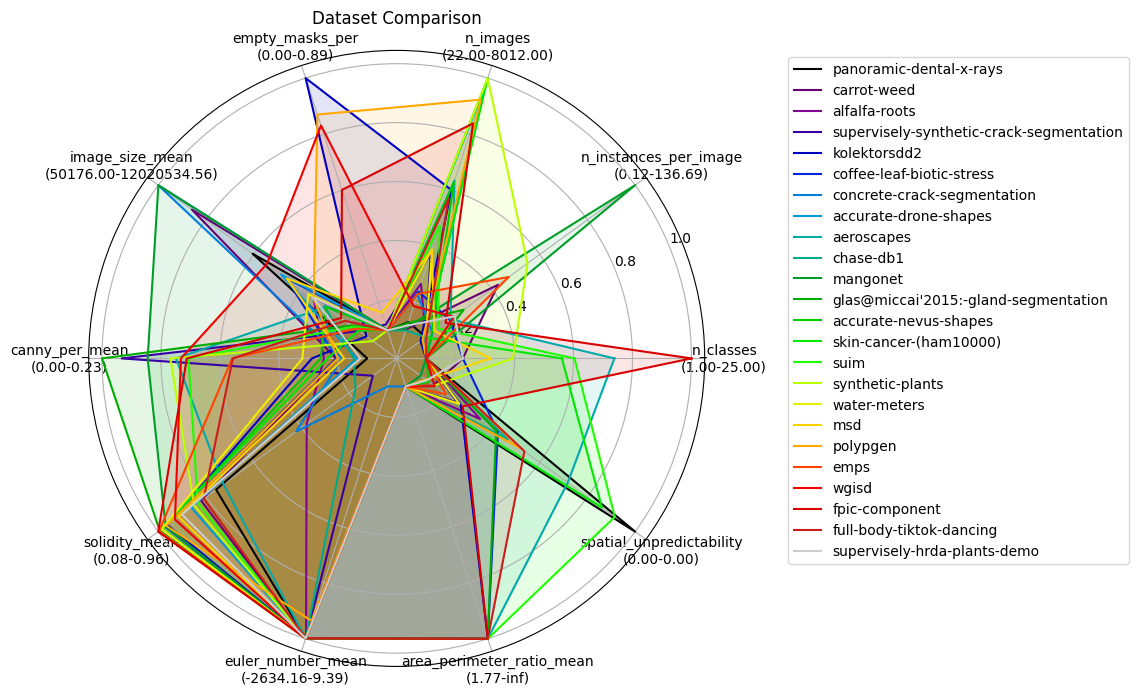

In [5]:
# Function to format axis labels with actual min-max values
def format_label(metric, min_val, max_val, precision=2):
    return f"{metric}\n({min_val:.{precision}f}-{max_val:.{precision}f})"

# Function to convert values to their logarithm
def to_log_scale(value):
    return np.log10(value) if value > 0 else 0

# Adjusted axis labels
adjusted_labels = [format_label(metric, mins[metric], maxs[metric]) for metric in metrics]

# Number of variables we're plotting
num_vars = len(metrics)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop"
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], adjusted_labels)

# get list of colors using jet
colors = cm.nipy_spectral(np.linspace(0, 1, len(norm_data)))

# Draw polygons for each dataset
for (nd, ds_name, color) in zip(norm_data, sel_ds_names, colors):
    nde = nd + nd[:1]  # Repeat the first value to close the polygon
    nde = [normalize_and_offset(to_log_scale(val), np.log10(0.1), np.log10(1), offset=0.1) for val in nde]  # Convert to log scale
    ax.plot(angles, nde, color=color, label=ds_name)
    ax.fill(angles, nde, color=color, alpha=0.1)

# Add some customization
plt.title('Dataset Comparison')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.0))
plt.show()


In [6]:
df

,dataset,single_class,many_instances,big_image,many_images,n_classes,n_instances_per_image,n_images,empty_masks_per,object_size_mean,...,image_size_std,canny_per_mean,canny_per_std,solidity_mean,solidity_std,euler_number_mean,euler_number_std,area_perimeter_ratio_mean,area_perimeter_ratio_std,spatial_unpredictability
0,panoramic-dental-x-rays,True,False,True,False,1,1.000000,92,0.000000,1.416070e+06,...,3.190170e+05,0.000910,0.000443,0.510977,0.030439,-1.000000,18.979394,155.992922,12.427034,7.954744e-19
1,carrot-weed,False,True,True,False,2,19.774194,31,0.000000,5.501428e+04,...,0.000000e+00,0.008765,0.004693,0.602849,0.186677,-12.774878,61.887243,15.673069,6.447414,1.375051e-20
2,alfalfa-roots,True,False,True,True,1,1.000000,493,0.000000,4.903978e+04,...,0.000000e+00,0.012454,0.004069,0.185314,0.054223,-26.563895,21.705536,5.676635,1.100213,7.970365e-20
3,supervisely-synthetic-crack-segmentation,True,False,False,True,1,0.994595,925,0.005405,5.718564e+03,...,0.000000e+00,0.188763,0.137881,0.084602,0.061679,4.696739,15.918488,1.774647,0.460318,4.356754e-20
4,kolektorsdd2,True,False,False,True,1,0.117925,2332,0.894511,3.510145e+03,...,3.681070e+03,0.016481,0.008713,0.870901,0.108501,0.996364,0.060193,inf,NaN,4.818921e-20
5,coffee-leaf-biotic-stress,False,True,True,True,2,5.715000,400,0.000000,1.206296e+05,...,0.000000e+00,0.008513,0.006241,0.892028,0.086044,0.723097,2.617469,inf,NaN,1.148785e-19
6,concrete-crack-segmentation,True,False,True,True,1,2.193989,366,0.000000,8.900985e+04,...,8.331542e+05,0.007055,0.010136,0.209216,0.128892,-2634.160648,2323.454240,4.679457,2.745231,1.475917e-20
7,accurate-drone-shapes,True,False,True,True,1,0.999862,7239,0.000138,6.323455e+02,...,1.382200e+06,0.003275,0.010309,0.670252,0.128329,0.743576,1.074078,3.680741,1.484590,5.906708e-22
8,aeroscapes,False,True,True,True,12,5.862648,2621,0.000000,1.571986e+05,...,0.000000e+00,0.108626,0.074962,0.471232,0.308316,9.390538,27.346670,inf,NaN,3.406608e-19
9,chase-db1,True,False,True,False,1,1.000000,22,0.000000,6.592886e+04,...,0.000000e+00,0.004033,0.001112,0.104527,0.013093,-12.590909,5.836088,3.051360,0.279826,1.373140e-19
